In [1]:
import psycopg2
from pandas import DataFrame
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Connect database with the set credentials in PG
db_connection = psycopg2.connect(
    user="tester",
    password="1234",
    host="localhost",
    port="5432",
    database="ThesisTry1"
)

#updated query
query = """
SELECT SE."Bruttoleistung", SE."AnzahlModule" 
from solar_extended as SE;
"""
# Create a cursor and execute the query
cursor = db_connection.cursor()
cursor.execute(query)

# Fetch all the rows from the result
results = cursor.fetchall()

df = DataFrame(results)

df.columns = ['Brutto','AnzahlModule']

# Drop rows with missing longitude or latitude values
df = df.dropna()
df['q'] = (df['Brutto'] / df['AnzahlModule']) * 1000
display(df)
brutto_sum = df['Brutto'].sum()
print("BruttoLeistung: ", brutto_sum)
print("Average Q: ", df['q'].mean())
df['q'].to_csv('qratio.csv', index=False)

,Brutto,AnzahlModule,q
0,3.960,22.0,180.000000
1,7.410,38.0,195.000000
2,5.040,16.0,315.000000
3,6.360,24.0,265.000000
4,7.200,30.0,240.000000
...,...,...,...
3299745,4.920,12.0,410.000000
3299746,7.740,18.0,430.000000
3299747,0.800,2.0,400.000000
3299748,0.800,2.0,400.000000


BruttoLeistung:  77556678.50699995
Average Q:  466.2105885240549


,Brutto,AnzahlModule,q
0,3.960,22.0,180.000000
1,7.410,38.0,195.000000
2,5.040,16.0,315.000000
3,6.360,24.0,265.000000
4,7.200,30.0,240.000000
...,...,...,...
3299745,4.920,12.0,410.000000
3299746,7.740,18.0,430.000000
3299747,0.800,2.0,400.000000
3299748,0.800,2.0,400.000000


Total Brutto sum: 37249505.62999998
Total AnzahlModule sum: 146152507.0
q: 431.2833345932782
499.0


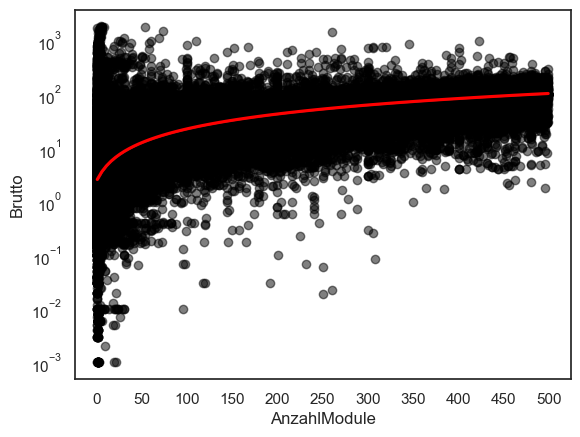

In [2]:
#Just excluding the biggest outliers. But not all. Just over 2000 & AnzahlModule 500
#This is just to show the x axis with interval of 50 and y with logarithmic scale


#display(df)
q_df = df.copy()

#q_df['q'] = (q_df['Brutto'] / q_df['AnzahlModule']) * 1000
# Filter rows where both 'Bruttoleistung' and 'AnzahlModule' are less than 10000
q_df = q_df[(q_df['Brutto'] < 2000) & (q_df['AnzahlModule'] < 500)] 

# Display the modified DataFrame
display(q_df)

# Calculate the total sum for 'Bruttoleistung' and 'AnzahlModule'
total_brutto_sum = q_df['Brutto'].sum()
total_anzahlmodule_sum = q_df['AnzahlModule'].sum()

print(f'Total Brutto sum: {total_brutto_sum}')
print(f'Total AnzahlModule sum: {total_anzahlmodule_sum}')

q = q_df['q'].mean()

print(f'q: {q}')
print(q_df['AnzahlModule'].max())


# Create a heatmap using seaborn
sns.set(style="white")

ax = sns.regplot(data=q_df, x="AnzahlModule", y="Brutto",
                 scatter_kws={"color": "black", "alpha": 0.5},
                 line_kws={"color": "red"})

# Set y-axis to log scale
ax.set_yscale("log")

# Set y-axis ticks with an interval of 50
ax.xaxis.set_major_locator(plt.FixedLocator(range(0, int(q_df['AnzahlModule'].max()) + 50, 50))) #copied from stackoverflow

# Show the plot
plt.show()

,Brutto,AnzahlModule,q
0,152.768,955.0,159.966492
1,2.920,15.0,194.666667
2,8.330,34.0,245.000000
3,17.640,84.0,210.000000
5,10.600,40.0,265.000000
...,...,...,...
3299744,9.479,39.0,243.051282
3299745,8.200,40.0,205.000000
3299746,13.395,57.0,235.000000
3299747,5.940,22.0,270.000000


Total outliers_Brutto sum: 49746124.80399997
Total AnzahlModule sum: 264391578.0
q: 560.3336184864755
Maximum Anzahlmodule 1000000.0


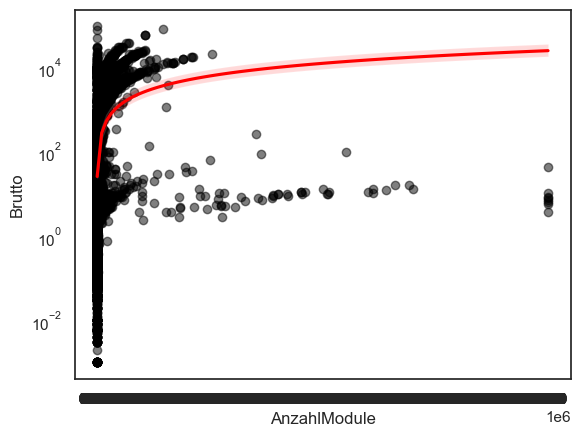

In [3]:
#outliers
# Create a new DataFrame containing rows where 'q' is not between 300 and 500
filtered_df = df[(df['q'] > 800) | (df['q'] < 200)].copy()


# Display the new DataFrame
display(filtered_df)


# Calculate the total sum for 'Bruttoleistung' and 'AnzahlModule'
total_brutto_sum_outliers = filtered_df['Brutto'].sum()
total_anzahlmodule_sum_outliers = filtered_df['AnzahlModule'].sum()

print(f'Total outliers_Brutto sum: {total_brutto_sum_outliers}')
print(f'Total AnzahlModule sum: {total_anzahlmodule_sum_outliers}')

outliers_q = filtered_df['q'].mean()

print(f'q: {outliers_q}')
print("Maximum Anzahlmodule",filtered_df['AnzahlModule'].max())
sns.set(style="white")

ax = sns.regplot(data=filtered_df, x="AnzahlModule", y="Brutto",
                 scatter_kws={"color": "black", "alpha": 0.5},
                 line_kws={"color": "red"})

# Set y-axis to log scale
ax.set_yscale("log")

# Set y-axis ticks with an interval of 50
ax.xaxis.set_major_locator(plt.FixedLocator(range(0, int(filtered_df['AnzahlModule'].max()) + 50, 50)))

# Show the plot
plt.show()

In [3]:
error_rate = total_brutto_sum_outliers/brutto_sum
print(error_rate*100, "%")

NameError: name 'total_brutto_sum_outliers' is not defined

In [ ]:
#Without_outliers
# Create a new DataFrame containing rows where 'q' is not between 300 and 500
filtered_df = df[(df['q'] < 500) & (df['q'] > 300)].copy()
filtered_df = filtered_df[(filtered_df['Brutto'] < 2000) & (filtered_df['AnzahlModule'] < 500)] 

# Display the new DataFrame
display(filtered_df)


# Calculate the total sum for 'Bruttoleistung' and 'AnzahlModule'
total_brutto_sum_outliers = filtered_df['Brutto'].sum()
total_anzahlmodule_sum_outliers = filtered_df['AnzahlModule'].sum()

print(f'Total outliers_Brutto sum: {total_brutto_sum_outliers}')
print(f'Total AnzahlModule sum: {total_anzahlmodule_sum_outliers}')

outliers_q = filtered_df['q'].mean()

print(f'q: {outliers_q}')

sns.set(style="white")

ax = sns.regplot(data=filtered_df, x="AnzahlModule", y="Brutto",
                 scatter_kws={"color": "black", "alpha": 0.5},
                 line_kws={"color": "red"})

# Set y-axis to log scale
ax.set_yscale("log")

# Set y-axis ticks with an interval of 50
ax.xaxis.set_major_locator(plt.FixedLocator(range(0, int(filtered_df['AnzahlModule'].max()) + 50, 50)))

# Show the plot
plt.show()

In [6]:
error_rate = total_brutto_sum_outliers/brutto_sum
print(error_rate*100, "%")

18.71453252435249 %


,Brutto,AnzahlModule,q
0,5.40,20.0,270.000000
1,7.56,27.0,280.000000
2,6.12,24.0,255.000000
3,7.84,32.0,245.000000
4,6.84,36.0,190.000000
...,...,...,...
9995,4.75,19.0,250.000000
9996,26.95,98.0,275.000000
9997,12.48,47.0,265.531915
9998,65.00,290.0,224.137931


BruttoLeistung:  329798.28
Average Q:  308.51799737450943


TypeError: the first argument to axis() must be an iterable of the form [xmin, xmax, ymin, ymax]

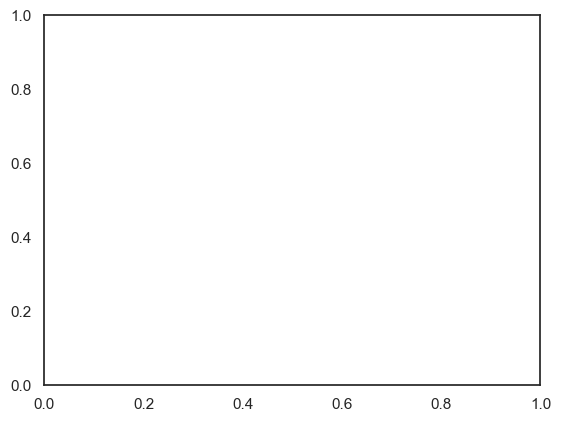

In [18]:
import psycopg2
from pandas import DataFrame
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with your database credentials
db_connection = psycopg2.connect(
    user="tester",
    password="1234",
    host="localhost",
    port="5432",
    database="ThesisTry1"
)

#updated query
query = """
SELECT SE."Bruttoleistung", SE."AnzahlModule" 
from solar_extended as SE
limit 10000;
"""
# Create a cursor and execute the query
cursor = db_connection.cursor()
cursor.execute(query)

# Fetch all the rows from the result
results = cursor.fetchall()

df = DataFrame(results)

df.columns = ['Brutto','AnzahlModule']

# Drop rows with missing longitude or latitude values
df = df.dropna()
df['q'] = (df['Brutto'] / df['AnzahlModule']) * 1000
display(df)
brutto_sum = df['Brutto'].sum()
print("BruttoLeistung: ", brutto_sum)
print("Average Q: ", df['q'].mean())



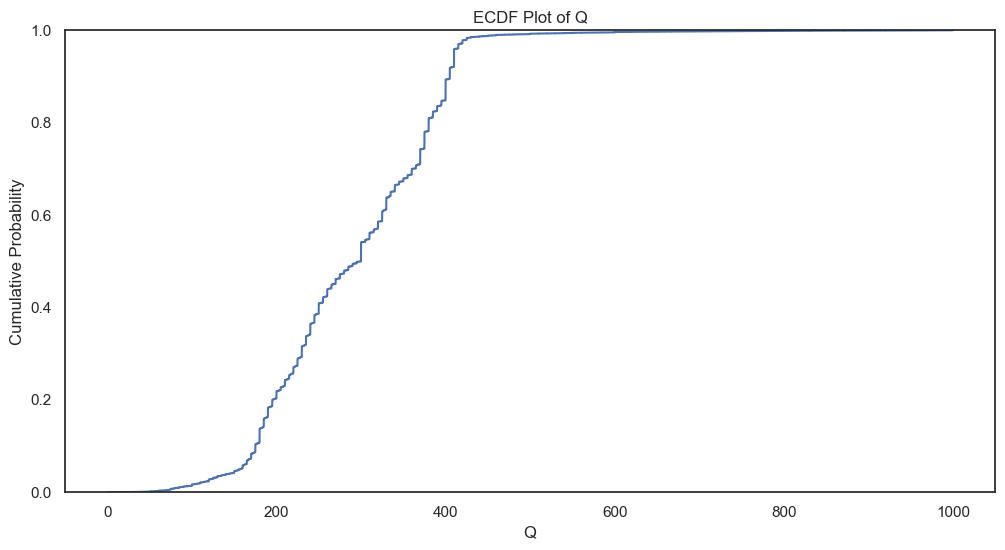

In [7]:
#Without_outliers
# Create a new DataFrame containing rows where 'q' is not between 300 and 500
#filtered_df = df[(df['q'] < 1000) & (df['q'] >0)].copy()
filtered_df = filtered_df[(filtered_df['Brutto'] < 2000) & (filtered_df['AnzahlModule'] < 500)] 
# Plot ECDF using Seaborn
plt.figure(figsize=(12, 6))
#sns.displot(filtered_df['q'], kind="ecdf")
sns.ecdfplot(data=filtered_df, x='q')
plt.title('ECDF Plot of Q')
plt.xlabel('Q')
plt.ylabel('Cumulative Probability')
plt.show()